In [3]:
import os
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
from astropy.io import ascii
from astropy.table import Table
import pandas as pd
%matplotlib inline
from analyze_sumfiles import get_sumfile

In [4]:
!ls /home/michele/sim/MySimulations/Moria8Gyr_tidal/results/sumfiles

60003.dat  69002_p200.0_a1000.0_r800.0_c8.15.dat
62002.dat  69002_p200.0_a600.0_r600.0_c8.15.dat
68003.dat  69002_p598.0_a600.0_r600.0_c8.15.dat
69002.dat  71002.dat


In [6]:
tidal_folder = "/home/michele/sim/MySimulations/Moria8Gyr_tidal/results/sumfiles/"
kick1 = os.path.join(tidal_folder, "69002_p200.0_a1000.0_r800.0_c8.15.dat")
kick2 = os.path.join(tidal_folder, "69002_p200.0_a600.0_r600.0_c8.15.dat")
kick3 = os.path.join(tidal_folder, "69002_p598.0_a600.0_r600.0_c8.15.dat")
moria = "/home/michele/sim/MoRIA/results/sumfiles/69002.dat"

In [10]:
a = get_sumfile(moria)
k1 = get_sumfile(kick1)
k2 = get_sumfile(kick2)
k3 = get_sumfile(kick3)
kicked = [k1, k2, k3]

In [16]:
def plot_property_multi(reference, tables, prop, unit=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    if unit is None:
        unit = reference[prop].unit
    time = reference['time'].to(u.Gyr)
    ax.plot(time, reference[prop].to(unit), "r", label="MoRIA")
    kicked = list()
    for k in tables:
        kicked.append(np.interp(reference['time'], k['time'], k[prop].to(unit), left=np.nan))
    for i, k in enumerate(kicked):
        ax.plot(time[:-1], k[:-1], label="Kicked {}".format(i+1))
        ax.set_xlabel('time (Gyr)')
    if unit is not u.dimensionless_unscaled:
        ax.set_ylabel("{0} ({1:latex})".format(prop,unit))
    else:
        ax.set_ylabel("{0}".format(prop))
    ax.set_title(prop)
    plt.legend(loc=0)

In [21]:
def plot_orbit(tables):
    fig, ax = plt.subplots()
    for i, k in enumerate(kicked):
        ax.plot(k['rcom_x'], k['rcom_y'], label="Kicked {}".format(i+1))
        ax.set_aspect('equal')
        plt.legend(loc=0)

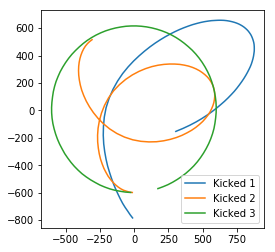

In [22]:
plot_orbit(kicked)

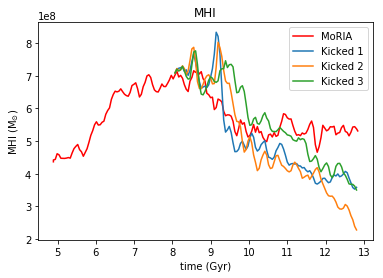

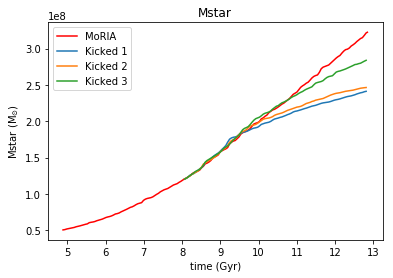

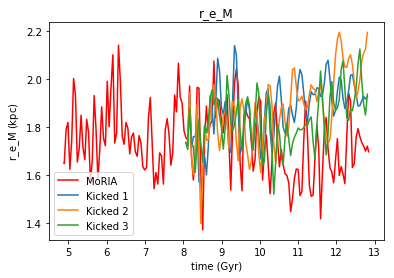

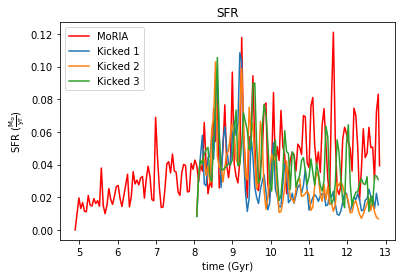

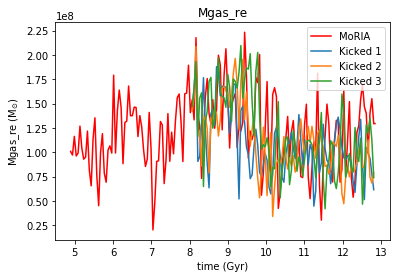

In [17]:
plot_property_multi(a, kicked, 'SFR')
plot_property_multi(a, kicked, 'Mstar', u.Msun)
plot_property_multi(a, kicked, 'r_e_M')
plot_property_multi(a, kicked, 'MHI', u.Msun)
plot_property_multi(a, kicked, 'Mgas_re', u.Msun)

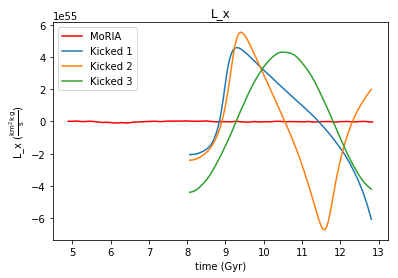

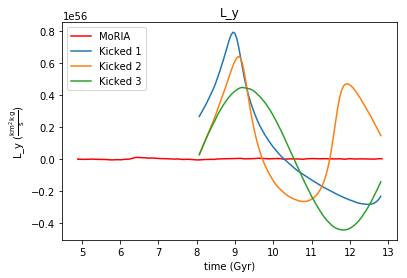

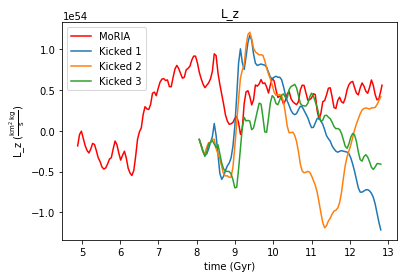

In [18]:
plot_property_multi(a, kicked, 'L_x', u.kg*u.km**2/u.s)
plot_property_multi(a, kicked, 'L_y', u.kg*u.km**2/u.s)
plot_property_multi(a, kicked, 'L_z', u.kg*u.km**2/u.s)